# Projeto de processamento de linguagem natural

Classificar Avaliações da Yelp em categorias de 1 estrela ou 5 estrelas com base no conteúdo do texto nas revisões.

[Conjunto de dados de reviews da Yelp da Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Cada observação neste conjunto de dados é uma revisão de um determinado negócio por um determinado usuário.

A coluna "stars" é o número de estrelas (1 a 5) atribuídas pelo revisor ao negócio (mis estrelas é melhor.) 
A coluna "cool" é o número de votos "legais" que esta avaliação recebeu de outros usuários de usuários.

Todas as avaliações começam com 0 votos "legais", e não há limite para quantos votos "legais" podem receber uma avaliação. Em outras palavras, é uma classificação da revisão em si, não uma classificação do negócio.

As colunas "useful" e "funny" são semelhantes à coluna "cool".

In [1]:
import numpy as np
import pandas as pd

In [2]:
yelp = pd.read_csv('yelp.csv')

In [3]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [5]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [10]:
yelp['text lenght'] = yelp['text'].apply(len)

In [11]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text lenght
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


**Analise exploratoria de dados**

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

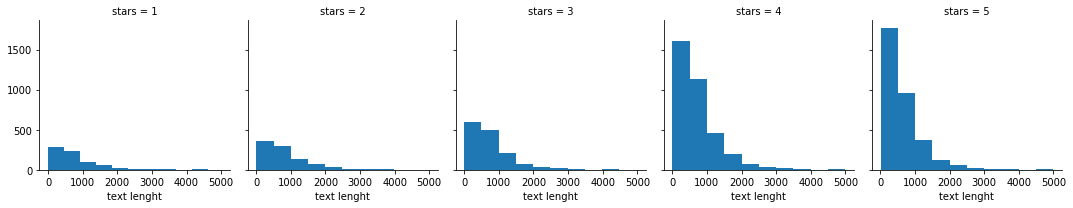

In [13]:
g = sns.FacetGrid(yelp , col='stars')
g.map(plt.hist, 'text lenght')

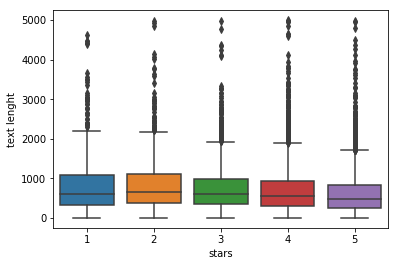

In [14]:
sns.boxplot(x = 'stars', y= 'text lenght', data = yelp)

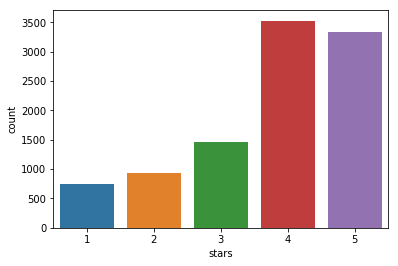

In [15]:
sns.countplot(x='stars', data = yelp)

In [17]:
stars = yelp.groupby('stars').mean()
stars

,cool,useful,funny,text lenght
stars,,,,
1,0.576769,1.604806,1.056075,826.524700
2,0.719525,1.563107,0.875944,842.265372
3,0.788501,1.306639,0.694730,758.505133
4,0.954623,1.395916,0.670448,712.944129
5,0.944261,1.381780,0.608631,625.015583


In [18]:
stars.corr()

,cool,useful,funny,text lenght
cool,1.000000,-0.743329,-0.944939,-0.857651
useful,-0.743329,1.000000,0.894506,0.699895
funny,-0.944939,0.894506,1.000000,0.843463
text lenght,-0.857651,0.699895,0.843463,1.000000


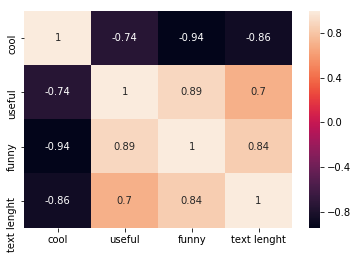

In [21]:
sns.heatmap(stars.corr(), annot = True)

**Classificação de PNL**

In [22]:
yelp_class = yelp[(yelp.stars == 1)| (yelp.stars ==5)]

In [25]:
yelp_class.stars.value_counts()

5    3337
1     749
Name: stars, dtype: int64

In [26]:
X = yelp_class['text']
y = yelp_class['stars']

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [28]:
X = cv.fit_transform(X)

**Divisão treino-teste**

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

**Treinando o Modelo**

In [32]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [33]:
nb = nb.fit(X_train , y_train)

**Previsões**

In [34]:
pred = nb.predict(X_test)

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[159  69]
 [ 22 976]]


              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

   micro avg       0.93      0.93      0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



**Processamento de texto**

In [37]:
from sklearn.feature_extraction.text import TfidfTransformer

In [38]:
from sklearn.pipeline import Pipeline

In [39]:
pipeline = Pipeline([
    ('bw', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
])

**Usando o Pipeline** - **Divisão de treino e teste**

In [42]:
X= yelp_class['text']
y= yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [43]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('bw', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        stri...         use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

**Predições e Avaliações**

In [48]:
pred =pipeline.predict(X_test)

In [49]:
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[  0 228]
 [  0 998]]


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

   micro avg       0.81      0.81      0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Taxa de 66% -  TfIdf não melhorou o desempenho do modelo.